In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.metrics import pairwise_distances
from community import community_louvain
from itertools import combinations
from networkx.algorithms import community
G=nx.karate_club_graph()
print(f"Graph Has {G.number_of_nodes()} Nodes And {G.number_of_edges()} Edges.")

Graph Has 34 Nodes And 78 Edges.


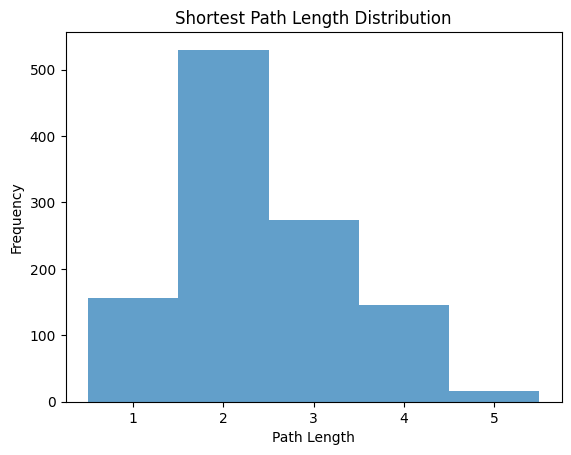

Diameter: 5
Radius: 3
Average Path Length: 2.408199643493761
Eccentricity: {0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 4, 13: 3, 14: 5, 15: 5, 16: 5, 17: 4, 18: 5, 19: 3, 20: 5, 21: 4, 22: 5, 23: 5, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 5, 30: 4, 31: 3, 32: 4, 33: 4}
Graph Density: 0.1390


In [2]:
diameter=nx.diameter(G)
radius=nx.radius(G)
avg_path_length=nx.average_shortest_path_length(G)
eccentricity=nx.eccentricity(G)
eccentricity_values=list(eccentricity.values())
shortest_path_lengths=dict(nx.all_pairs_shortest_path_length(G))
path_length_distribution=[length for lengths in shortest_path_lengths.values() for length in lengths.values()]
plt.hist(path_length_distribution,bins=range(1,max(path_length_distribution)+2),align='left',alpha=0.7)
plt.title("Shortest Path Length Distribution")
plt.xlabel("Path Length")
plt.ylabel("Frequency")
plt.show()
print(f"Diameter: {diameter}")
print(f"Radius: {radius}")
print(f"Average Path Length: {avg_path_length}")
print(f"Eccentricity: {eccentricity}")
print(f"Graph Density: {nx.density(G):.4f}")

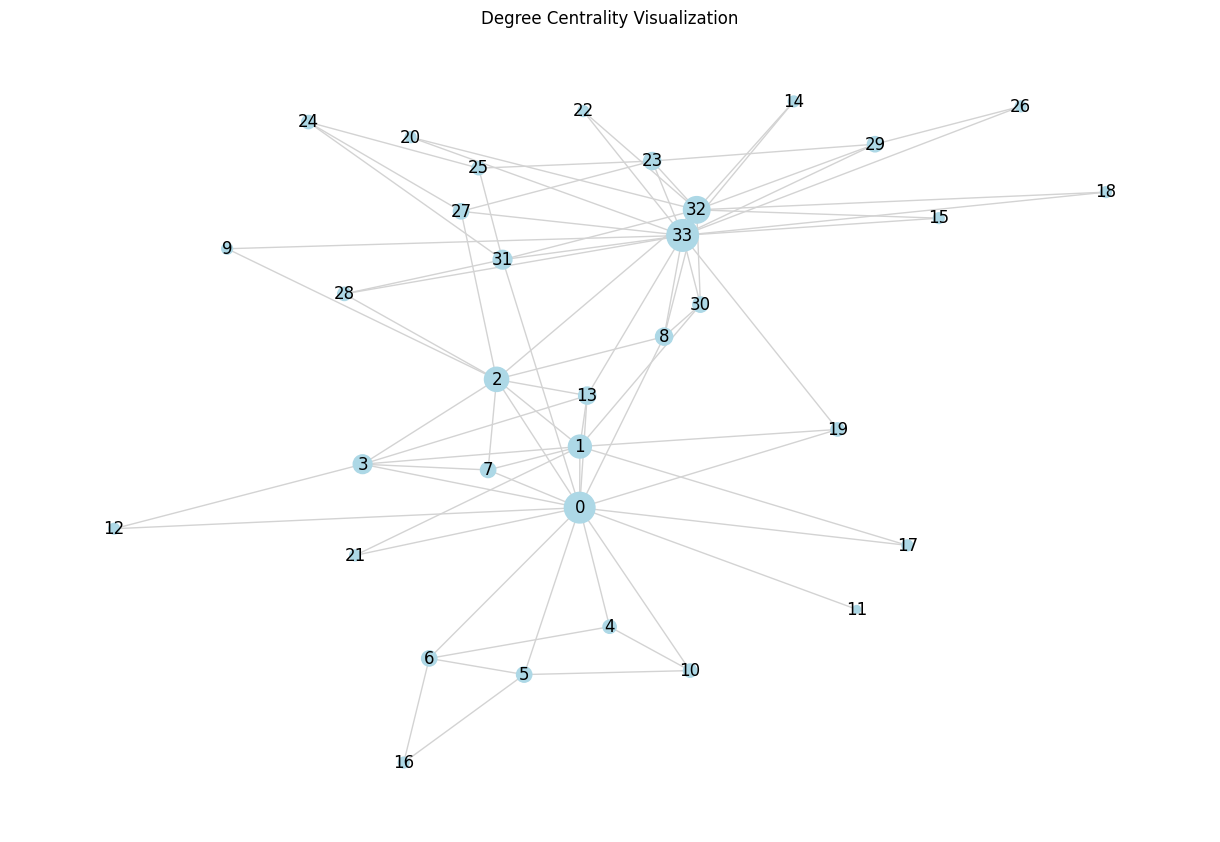

Degree Centrality (Ranked):
Node 33: 0.5152
Node 0: 0.4848
Node 32: 0.3636
Node 2: 0.3030
Node 1: 0.2727
Node 3: 0.1818
Node 31: 0.1818
Node 8: 0.1515
Node 13: 0.1515
Node 23: 0.1515
Node 5: 0.1212
Node 6: 0.1212
Node 7: 0.1212
Node 27: 0.1212
Node 29: 0.1212
Node 30: 0.1212
Node 4: 0.0909
Node 10: 0.0909
Node 19: 0.0909
Node 24: 0.0909
Node 25: 0.0909
Node 28: 0.0909
Node 9: 0.0606
Node 12: 0.0606
Node 14: 0.0606
Node 15: 0.0606
Node 16: 0.0606
Node 17: 0.0606
Node 18: 0.0606
Node 20: 0.0606
Node 21: 0.0606
Node 22: 0.0606
Node 26: 0.0606
Node 11: 0.0303


In [3]:
degree_centrality=nx.degree_centrality(G)
sorted_degree=sorted(degree_centrality.items(),key=lambda x:x[1],reverse=True)
plt.figure(figsize=(12,8))
nx.draw(G,with_labels=True,node_color='lightblue',node_size=[v * 1000 for v in degree_centrality.values()],edge_color='lightgray')
plt.title("Degree Centrality Visualization")
plt.show()
print("Degree Centrality (Ranked):")
for node, centrality in sorted_degree:
    print(f"Node {node}: {centrality:.4f}")

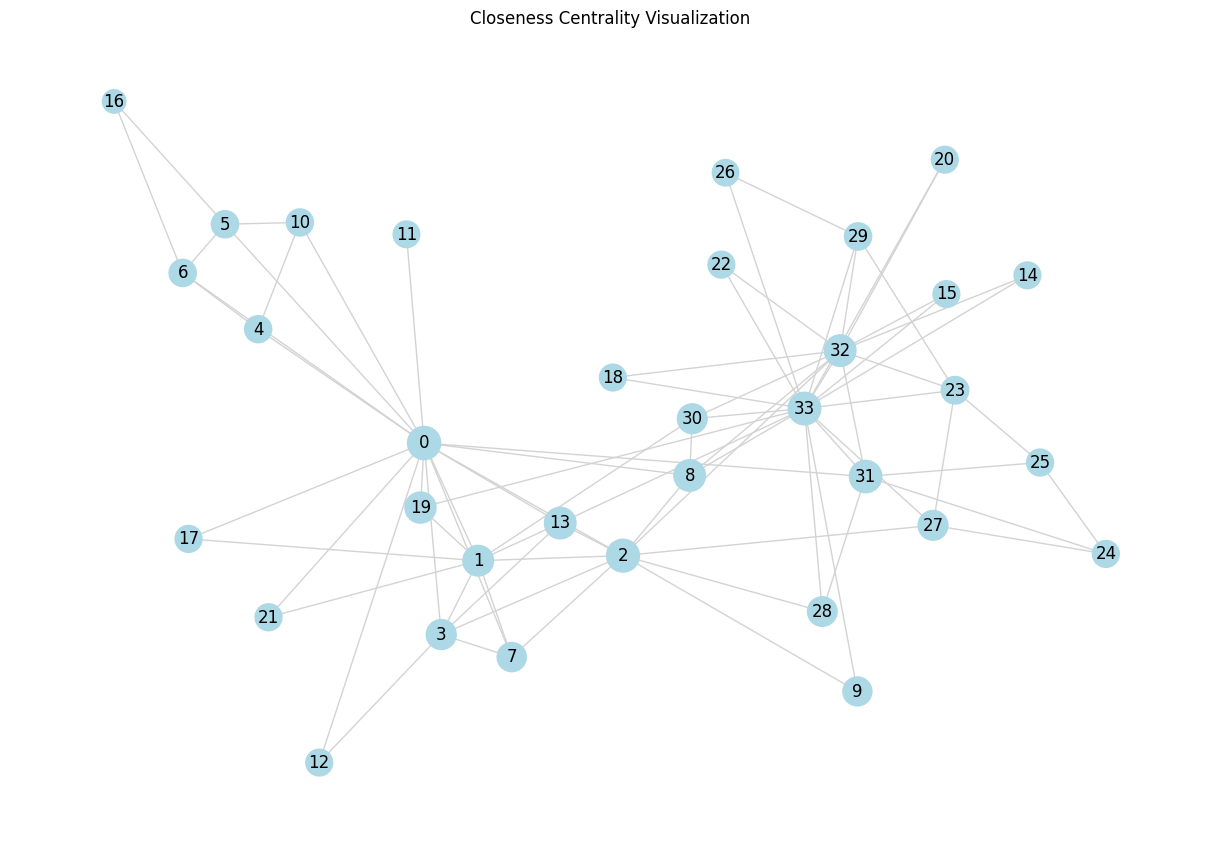

Closeness Centrality (Ranked):
Node 0: 0.5690
Node 2: 0.5593
Node 33: 0.5500
Node 31: 0.5410
Node 8: 0.5156
Node 13: 0.5156
Node 32: 0.5156
Node 19: 0.5000
Node 1: 0.4853
Node 3: 0.4648
Node 27: 0.4583
Node 30: 0.4583
Node 28: 0.4521
Node 7: 0.4400
Node 9: 0.4342
Node 23: 0.3929
Node 5: 0.3837
Node 6: 0.3837
Node 29: 0.3837
Node 4: 0.3793
Node 10: 0.3793
Node 17: 0.3750
Node 21: 0.3750
Node 24: 0.3750
Node 25: 0.3750
Node 12: 0.3708
Node 14: 0.3708
Node 15: 0.3708
Node 18: 0.3708
Node 20: 0.3708
Node 22: 0.3708
Node 11: 0.3667
Node 26: 0.3626
Node 16: 0.2845


In [4]:
closeness_centrality=nx.closeness_centrality(G)
sorted_closeness=sorted(closeness_centrality.items(),key=lambda x:x[1],reverse=True)
plt.figure(figsize=(12,8))
nx.draw(G,with_labels=True,node_color='lightblue',node_size=[v * 1000 for v in closeness_centrality.values()],edge_color='lightgray')
plt.title("Closeness Centrality Visualization")
plt.show()
print("Closeness Centrality (Ranked):")
for node, centrality in sorted_closeness:
    print(f"Node {node}: {centrality:.4f}")

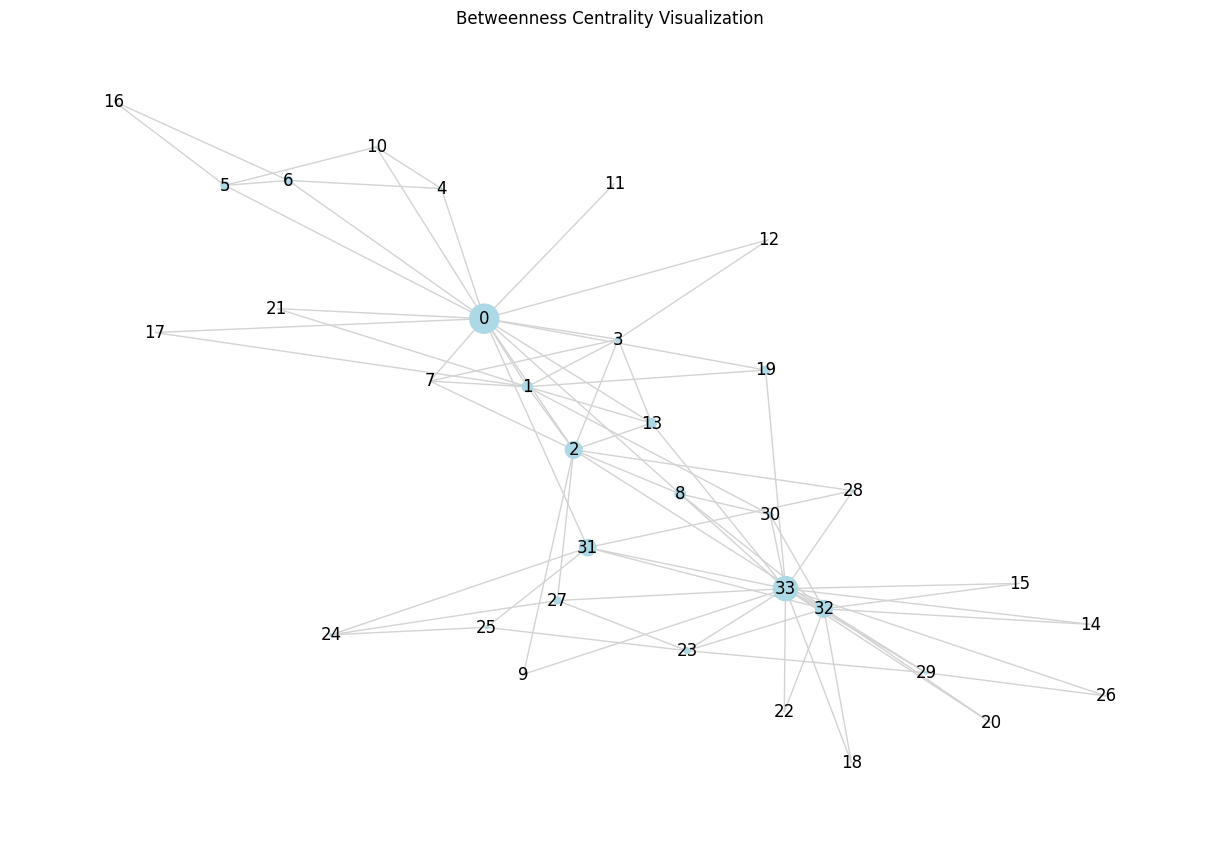

Betweenness Centrality (Ranked):
Node 0: 0.4376
Node 33: 0.3041
Node 32: 0.1452
Node 2: 0.1437
Node 31: 0.1383
Node 8: 0.0559
Node 1: 0.0539
Node 13: 0.0459
Node 19: 0.0325
Node 5: 0.0300
Node 6: 0.0300
Node 27: 0.0223
Node 23: 0.0176
Node 30: 0.0144
Node 3: 0.0119
Node 25: 0.0038
Node 29: 0.0029
Node 24: 0.0022
Node 28: 0.0018
Node 9: 0.0008
Node 4: 0.0006
Node 10: 0.0006
Node 7: 0.0000
Node 11: 0.0000
Node 12: 0.0000
Node 14: 0.0000
Node 15: 0.0000
Node 16: 0.0000
Node 17: 0.0000
Node 18: 0.0000
Node 20: 0.0000
Node 21: 0.0000
Node 22: 0.0000
Node 26: 0.0000


In [5]:
betweenness_centrality=nx.betweenness_centrality(G)
sorted_betweenness=sorted(betweenness_centrality.items(),key=lambda x:x[1],reverse=True)
plt.figure(figsize=(12,8))
nx.draw(G,with_labels=True,node_color='lightblue',node_size=[v * 1000 for v in betweenness_centrality.values()],edge_color='lightgray')
plt.title("Betweenness Centrality Visualization")
plt.show()
print("Betweenness Centrality (Ranked):")
for node, centrality in sorted_betweenness:
    print(f"Node {node}: {centrality:.4f}")

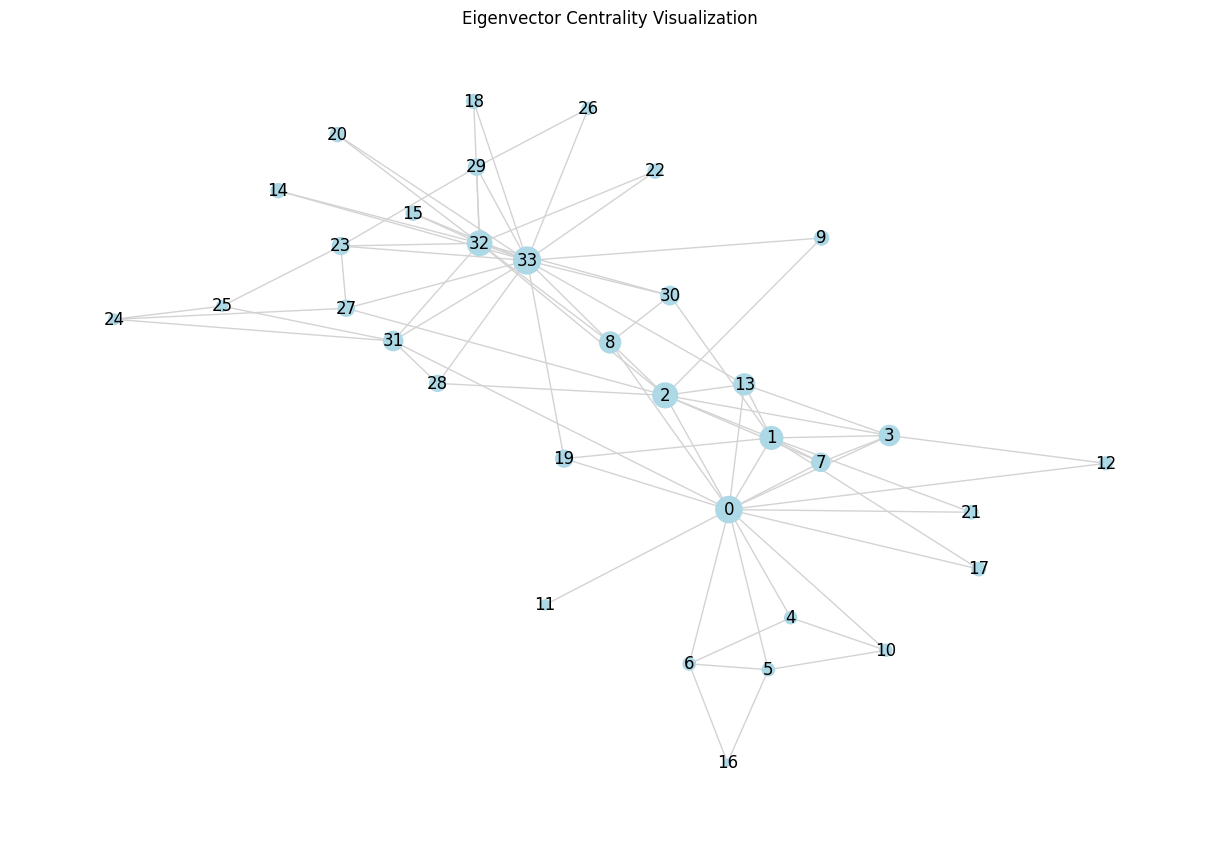

Eigenvector Centrality (Ranked):
Node 33: 0.3734
Node 0: 0.3555
Node 2: 0.3172
Node 32: 0.3087
Node 1: 0.2660
Node 8: 0.2274
Node 13: 0.2265
Node 3: 0.2112
Node 31: 0.1910
Node 30: 0.1748
Node 7: 0.1710
Node 23: 0.1501
Node 19: 0.1479
Node 29: 0.1350
Node 27: 0.1335
Node 28: 0.1311
Node 9: 0.1027
Node 14: 0.1014
Node 15: 0.1014
Node 18: 0.1014
Node 20: 0.1014
Node 22: 0.1014
Node 17: 0.0924
Node 21: 0.0924
Node 12: 0.0843
Node 5: 0.0795
Node 6: 0.0795
Node 4: 0.0760
Node 10: 0.0760
Node 26: 0.0756
Node 25: 0.0592
Node 24: 0.0571
Node 11: 0.0529
Node 16: 0.0236


In [6]:
eigenvector_centrality=nx.eigenvector_centrality(G)
sorted_eigenvector=sorted(eigenvector_centrality.items(),key=lambda x:x[1],reverse=True)
plt.figure(figsize=(12,8))
nx.draw(G,with_labels=True,node_color='lightblue',node_size=[v * 1000 for v in eigenvector_centrality.values()],edge_color='lightgray')
plt.title("Eigenvector Centrality Visualization")
plt.show()
print("Eigenvector Centrality (Ranked):")
for node, centrality in sorted_eigenvector:
    print(f"Node {node}: {centrality:.4f}")

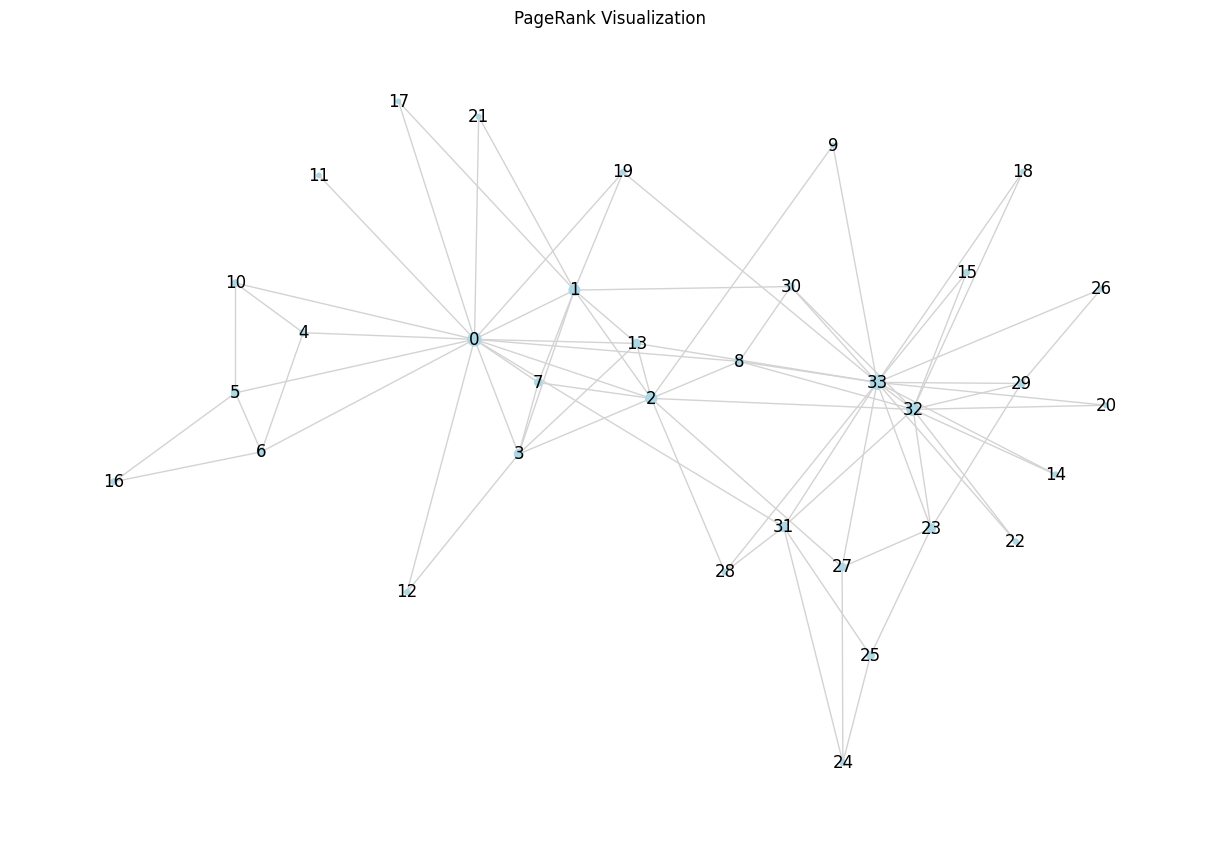

PageRank (Ranked):
Node 33: 0.0970
Node 0: 0.0885
Node 32: 0.0759
Node 2: 0.0628
Node 1: 0.0574
Node 31: 0.0420
Node 23: 0.0411
Node 3: 0.0372
Node 5: 0.0338
Node 13: 0.0335
Node 8: 0.0334
Node 6: 0.0315
Node 25: 0.0287
Node 29: 0.0283
Node 27: 0.0272
Node 7: 0.0265
Node 30: 0.0230
Node 10: 0.0207
Node 4: 0.0205
Node 16: 0.0168
Node 24: 0.0166
Node 15: 0.0164
Node 26: 0.0152
Node 28: 0.0145
Node 19: 0.0131
Node 22: 0.0130
Node 14: 0.0129
Node 12: 0.0115
Node 21: 0.0114
Node 20: 0.0112
Node 11: 0.0098
Node 17: 0.0097
Node 18: 0.0095
Node 9: 0.0095


In [7]:
pagerank=nx.pagerank(G)
sorted_pagerank=sorted(pagerank.items(),key=lambda x:x[1],reverse=True)
plt.figure(figsize=(12,8))
nx.draw(G,with_labels=True,node_color='lightblue',node_size=[v * 1000 for v in pagerank.values()],edge_color='lightgray')
plt.title("PageRank Visualization")
plt.show()
print("PageRank (Ranked):")
for node, centrality in sorted_pagerank:
    print(f"Node {node}: {centrality:.4f}")

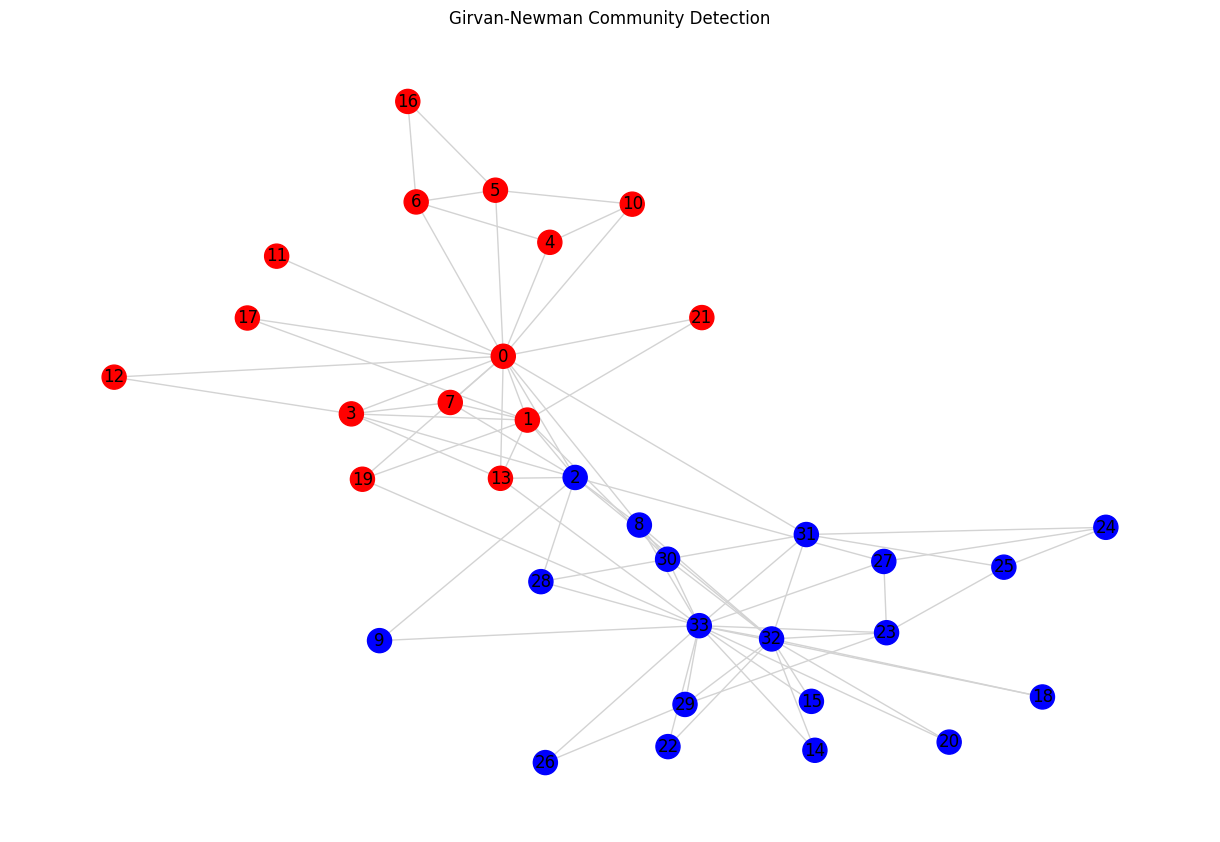

In [8]:
def girvan_newman_communities(G):
    comp=community.girvan_newman(G)
    top_level=next(comp)
    return list(top_level)
girvan_communities=girvan_newman_communities(G)
girvan_colors=['red' if node in girvan_communities[0] else 'blue' for node in G.nodes()]
plt.figure(figsize=(12,8))
nx.draw(G,with_labels=True,node_color=girvan_colors,edge_color='lightgray')
plt.title("Girvan-Newman Community Detection")
plt.show()

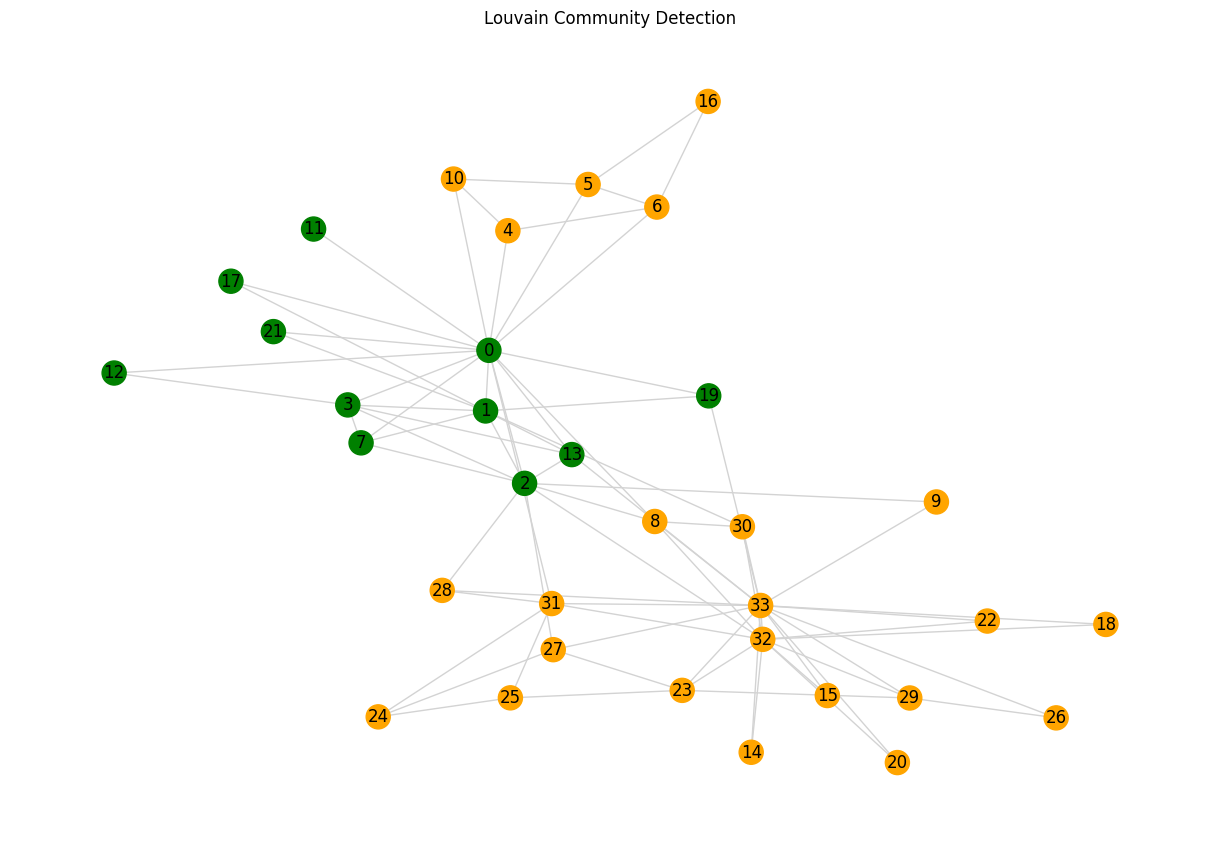

In [9]:
louvain_communities=community.louvain_communities(G)
louvain_colors=['green' if node in louvain_communities[0] else 'orange' for node in G.nodes()]
plt.figure(figsize=(12,8))
nx.draw(G,with_labels=True,node_color=louvain_colors,edge_color='lightgray')
plt.title("Louvain Community Detection")
plt.show()

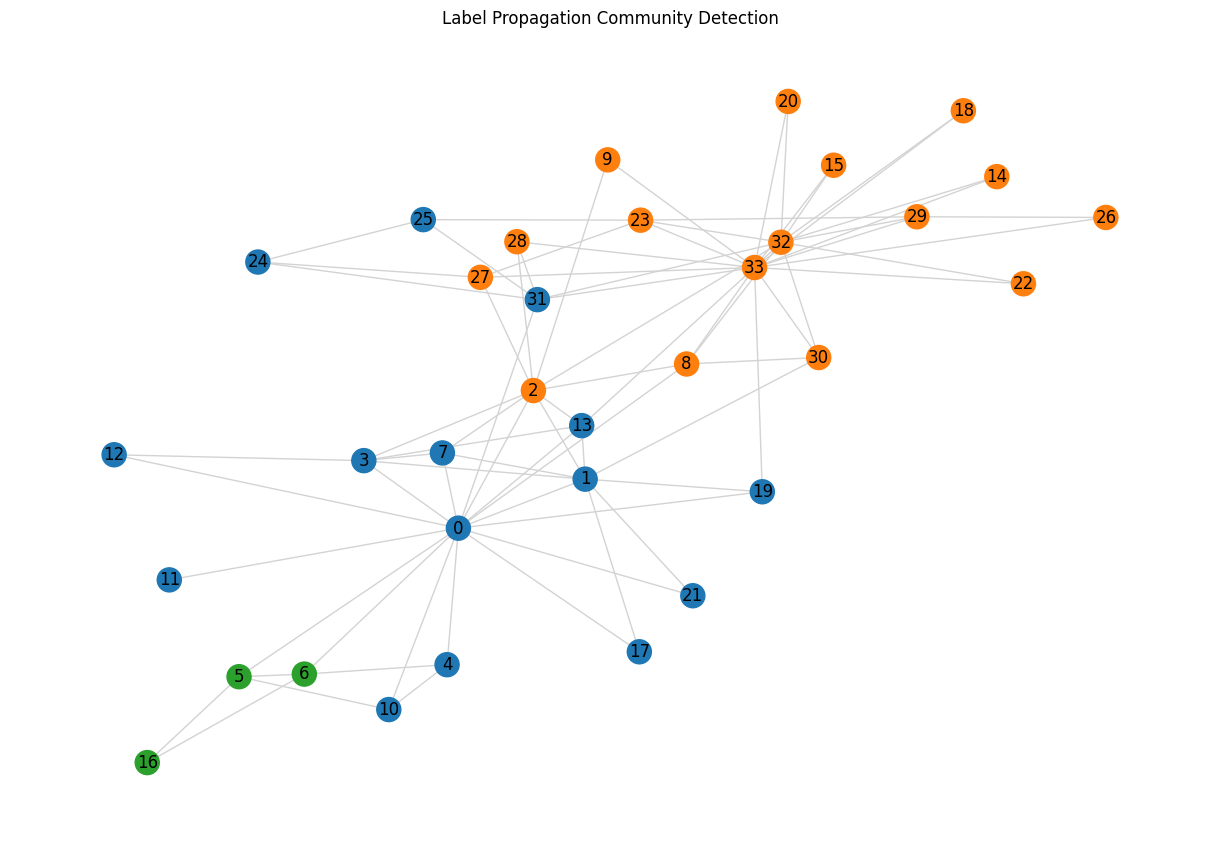

In [10]:
label_communities=list(community.label_propagation_communities(G))
label_colors=[]
for node in G.nodes():
    for i, comm in enumerate(label_communities):
        if node in comm:
            label_colors.append(f"C{i}")
            break
plt.figure(figsize=(12,8))
nx.draw(G,with_labels=True,node_color=label_colors,edge_color='lightgray')
plt.title("Label Propagation Community Detection")
plt.show()

Average Clustering Coefficient: 0.5706


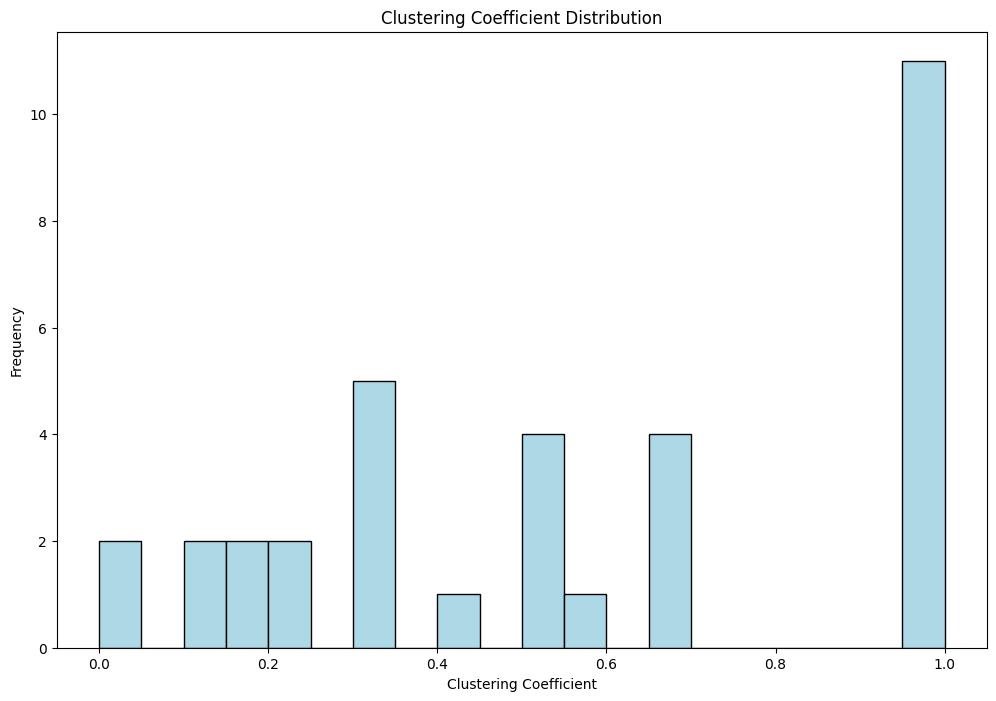

In [11]:
avg_clustering_coefficient=nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering_coefficient:.4f}")
clustering_coeffs=nx.clustering(G)
plt.figure(figsize=(12,8))
plt.hist(list(clustering_coeffs.values()),bins=20,color='lightblue',edgecolor='black')
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

Enter the value of k for K-Core Decomposition:  2


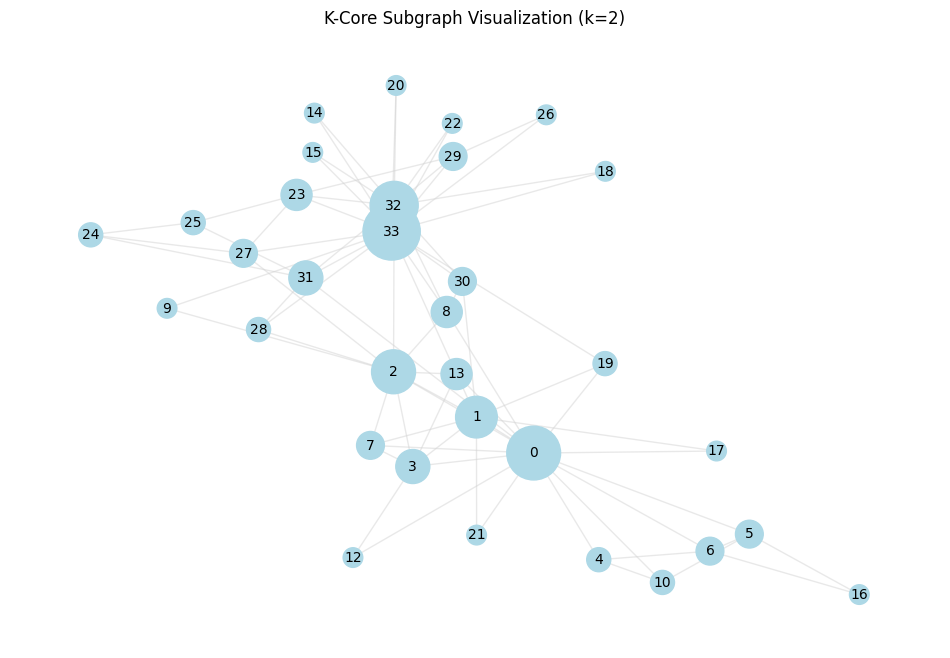

In [12]:
k=int(input("Enter the value of k for K-Core Decomposition: "))
k_core_subgraph=nx.k_core(G,k)
plt.figure(figsize=(12,8))
pos=nx.spring_layout(k_core_subgraph)
nx.draw_networkx_edges(k_core_subgraph,pos,alpha=0.5,edge_color='lightgray')
node_sizes=[100*k_core_subgraph.degree(node) for node in k_core_subgraph.nodes()]
nx.draw_networkx_nodes(k_core_subgraph,pos,node_size=node_sizes,node_color='lightblue')
nx.draw_networkx_labels(k_core_subgraph,pos,font_size=10,font_color='black')
plt.title(f'K-Core Subgraph Visualization (k={k})')
plt.axis('off')
plt.show()

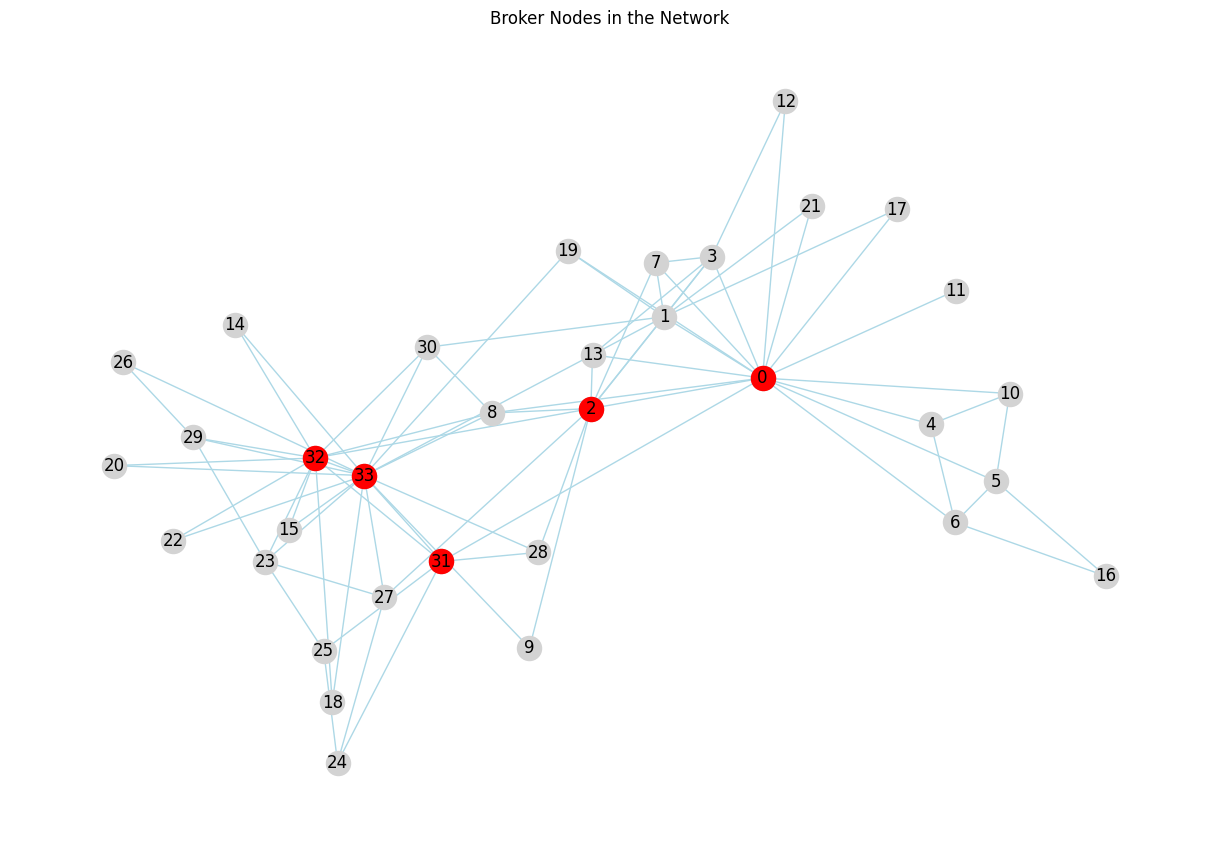

In [13]:
betweenness=nx.betweenness_centrality(G)
top_broker_nodes=sorted(betweenness.items(),key=lambda x:x[1],reverse=True)[:5]
plt.figure(figsize=(12,8))
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,node_color='lightgray',edge_color='lightblue')
nx.draw_networkx_nodes(G,pos,nodelist=[node for node, _ in top_broker_nodes],node_color='red')
plt.title('Broker Nodes in the Network')
plt.show()